<a href="https://colab.research.google.com/github/mrFahrenhiet/COVID_19_Mask_Detection/blob/master/MaskDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask Detection

## Dataset

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "shreyanshgupta" # username from the json file
os.environ['KAGGLE_KEY'] = "53c4292282781654b84c32cbb8cb1ea0" # key from the json file
!kaggle datasets download -d moussaid/mask-detection
!unzip 'mask-detection.zip'

 96% 76.0M/78.8M [00:02<00:00, 31.8MB/s]
100% 78.8M/78.8M [00:02<00:00, 35.7MB/s]
Archive:  mask-detection.zip
  inflating: face_mask_data/face_with_mask_0.jpg  
  inflating: face_mask_data/face_with_mask_1.jpg  
  inflating: face_mask_data/face_with_mask_10.jpg  
  inflating: face_mask_data/face_with_mask_100.jpg  
  inflating: face_mask_data/face_with_mask_101.jpg  
  inflating: face_mask_data/face_with_mask_102.jpg  
  inflating: face_mask_data/face_with_mask_103.jpg  
  inflating: face_mask_data/face_with_mask_104.jpg  
  inflating: face_mask_data/face_with_mask_105.jpg  
  inflating: face_mask_data/face_with_mask_106.jpg  
  inflating: face_mask_data/face_with_mask_107.jpg  
  inflating: face_mask_data/face_with_mask_108.jpg  
  inflating: face_mask_data/face_with_mask_109.jpg  
  inflating: face_mask_data/face_with_mask_11.jpg  
  inflating: face_mask_data/face_with_mask_110.jpg  
  inflating: face_mask_data/face_with_mask_111.jpg  
  inflating: face_mask_data/face_with_mask_112.

In [2]:
os.environ['KAGGLE_USERNAME'] = "shreyanshgupta" # username from the json file
os.environ['KAGGLE_KEY'] = "53c4292282781654b84c32cbb8cb1ea0" # key from the json file
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset
!unzip 'covid-face-mask-detection-dataset.zip'

 97% 201M/207M [00:16<00:00, 18.6MB/s]
100% 207M/207M [00:16<00:00, 13.4MB/s]
Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/

In [3]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import re
from shutil import copyfile
import shutil
import random
import os

In [4]:
img_list = os.listdir('./face_mask_data')

In [5]:
os.mkdir('./Dataset')
os.mkdir('./Dataset/Train')
os.mkdir('./Dataset/Val')
os.mkdir('./Dataset/Test')

In [6]:
os.mkdir('./Dataset/Train/Mask')
os.mkdir('./Dataset/Train/No-Mask')
os.mkdir('./Dataset/Val/Mask')
os.mkdir('./Dataset/Val/No-Mask')
os.mkdir('./Dataset/Test/Mask')
os.mkdir('./Dataset/Test/No-Mask')

In [7]:
data = os.listdir('/content/face_mask_data')

In [8]:
type(data[0])

str

In [9]:
data_mask = [i for i in data if 'face_with_mask' in i]

In [10]:
data_no_mask = [i for i in data if 'face_without_mask' in i]

In [11]:
data_mask = ['/content/face_mask_data/'+i for i in data_mask]
data_no_mask = ['/content/face_mask_data/'+i for i in data_no_mask]

In [12]:
data_mask

['/content/face_mask_data/face_with_mask_372.jpg',
 '/content/face_mask_data/face_with_mask_278.jpg',
 '/content/face_mask_data/face_with_mask_386.jpg',
 '/content/face_mask_data/face_with_mask_101.jpg',
 '/content/face_mask_data/face_with_mask_188.jpg',
 '/content/face_mask_data/face_with_mask_2.jpg',
 '/content/face_mask_data/face_with_mask_190.jpg',
 '/content/face_mask_data/face_with_mask_159.jpg',
 '/content/face_mask_data/face_with_mask_71.jpg',
 '/content/face_mask_data/face_with_mask_447.jpg',
 '/content/face_mask_data/face_with_mask_192.jpg',
 '/content/face_mask_data/face_with_mask_229.jpg',
 '/content/face_mask_data/face_with_mask_300.jpg',
 '/content/face_mask_data/face_with_mask_220.jpg',
 '/content/face_mask_data/face_with_mask_1.jpg',
 '/content/face_mask_data/face_with_mask_153.jpg',
 '/content/face_mask_data/face_with_mask_413.jpg',
 '/content/face_mask_data/face_with_mask_258.jpg',
 '/content/face_mask_data/face_with_mask_73.jpg',
 '/content/face_mask_data/face_with_m

In [13]:
data_no_mask

['/content/face_mask_data/face_without_mask_528.jpg',
 '/content/face_mask_data/face_without_mask_474.jpg',
 '/content/face_mask_data/face_without_mask_171.jpg',
 '/content/face_mask_data/face_without_mask_17.jpg',
 '/content/face_mask_data/face_without_mask_153.jpg',
 '/content/face_mask_data/face_without_mask_87.jpg',
 '/content/face_mask_data/face_without_mask_516.jpg',
 '/content/face_mask_data/face_without_mask_367.jpg',
 '/content/face_mask_data/face_without_mask_110.jpg',
 '/content/face_mask_data/face_without_mask_277.jpg',
 '/content/face_mask_data/face_without_mask_217.jpg',
 '/content/face_mask_data/face_without_mask_100.jpg',
 '/content/face_mask_data/face_without_mask_372.jpg',
 '/content/face_mask_data/face_without_mask_384.jpg',
 '/content/face_mask_data/face_without_mask_428.jpg',
 '/content/face_mask_data/face_without_mask_488.jpg',
 '/content/face_mask_data/face_without_mask_499.jpg',
 '/content/face_mask_data/face_without_mask_527.jpg',
 '/content/face_mask_data/face

In [14]:
random.shuffle(data_mask)
random.shuffle(data_no_mask)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_mask_len = round(len(data_mask)*0.7)
train_no_mask_len = round(len(data_no_mask)*0.7)

val_mask_len = round(len(data_mask)*0.1)
val_no_mask_len = round(len(data_no_mask)*0.1)

test_mask_len = round(len(data_mask)*0.2)
test_no_mask_len = round(len(data_no_mask)*0.2)

In [17]:
print(train_mask_len)
print(test_mask_len)
print(val_mask_len)

318
91
45


In [18]:
test_mask_len += train_mask_len
test_no_mask_len += train_no_mask_len

In [19]:
val_mask_len += test_mask_len
val_no_mask_len += test_no_mask_len

In [20]:
print(train_mask_len)
print(test_mask_len)
print(val_mask_len)

318
409
454


In [21]:
print(train_no_mask_len)
print(test_no_mask_len)
print(val_no_mask_len)

379
487
541


In [22]:
train_mask = data_mask[:train_mask_len]
test_mask = data_mask[train_mask_len:test_mask_len]
val_mask = data_mask[test_mask_len:val_mask_len]

In [23]:
train_no_mask = data_no_mask[:train_no_mask_len]
test_no_mask = data_no_mask[train_no_mask_len:test_no_mask_len]
val_no_mask = data_no_mask[test_no_mask_len:val_no_mask_len]

In [24]:
print(train_mask)
print(train_no_mask)

['/content/face_mask_data/face_with_mask_359.jpg', '/content/face_mask_data/face_with_mask_152.jpg', '/content/face_mask_data/face_with_mask_185.jpg', '/content/face_mask_data/face_with_mask_226.jpg', '/content/face_mask_data/face_with_mask_13.jpg', '/content/face_mask_data/face_with_mask_263.jpg', '/content/face_mask_data/face_with_mask_374.jpg', '/content/face_mask_data/face_with_mask_7.jpg', '/content/face_mask_data/face_with_mask_239.jpg', '/content/face_mask_data/face_with_mask_157.jpg', '/content/face_mask_data/face_with_mask_432.jpg', '/content/face_mask_data/face_with_mask_143.jpg', '/content/face_mask_data/face_with_mask_175.jpg', '/content/face_mask_data/face_with_mask_353.jpg', '/content/face_mask_data/face_with_mask_99.jpg', '/content/face_mask_data/face_with_mask_264.jpg', '/content/face_mask_data/face_with_mask_29.jpg', '/content/face_mask_data/face_with_mask_235.jpg', '/content/face_mask_data/face_with_mask_292.jpg', '/content/face_mask_data/face_with_mask_381.jpg', '/co

In [25]:
print(test_mask)
print(test_no_mask)

['/content/face_mask_data/face_with_mask_118.jpg', '/content/face_mask_data/face_with_mask_217.jpg', '/content/face_mask_data/face_with_mask_269.jpg', '/content/face_mask_data/face_with_mask_47.jpg', '/content/face_mask_data/face_with_mask_151.jpg', '/content/face_mask_data/face_with_mask_287.jpg', '/content/face_mask_data/face_with_mask_280.jpg', '/content/face_mask_data/face_with_mask_172.jpg', '/content/face_mask_data/face_with_mask_139.jpg', '/content/face_mask_data/face_with_mask_316.jpg', '/content/face_mask_data/face_with_mask_403.jpg', '/content/face_mask_data/face_with_mask_298.jpg', '/content/face_mask_data/face_with_mask_314.jpg', '/content/face_mask_data/face_with_mask_434.jpg', '/content/face_mask_data/face_with_mask_364.jpg', '/content/face_mask_data/face_with_mask_17.jpg', '/content/face_mask_data/face_with_mask_241.jpg', '/content/face_mask_data/face_with_mask_26.jpg', '/content/face_mask_data/face_with_mask_144.jpg', '/content/face_mask_data/face_with_mask_273.jpg', '/

In [26]:
print(val_mask)
print(val_no_mask)

['/content/face_mask_data/face_with_mask_142.jpg', '/content/face_mask_data/face_with_mask_198.jpg', '/content/face_mask_data/face_with_mask_75.jpg', '/content/face_mask_data/face_with_mask_158.jpg', '/content/face_mask_data/face_with_mask_455.jpg', '/content/face_mask_data/face_with_mask_196.jpg', '/content/face_mask_data/face_with_mask_108.jpg', '/content/face_mask_data/face_with_mask_288.jpg', '/content/face_mask_data/face_with_mask_341.jpg', '/content/face_mask_data/face_with_mask_417.jpg', '/content/face_mask_data/face_with_mask_148.jpg', '/content/face_mask_data/face_with_mask_109.jpg', '/content/face_mask_data/face_with_mask_267.jpg', '/content/face_mask_data/face_with_mask_301.jpg', '/content/face_mask_data/face_with_mask_325.jpg', '/content/face_mask_data/face_with_mask_163.jpg', '/content/face_mask_data/face_with_mask_192.jpg', '/content/face_mask_data/face_with_mask_162.jpg', '/content/face_mask_data/face_with_mask_74.jpg', '/content/face_mask_data/face_with_mask_347.jpg', '

In [27]:
for i in range(len(train_mask)):
  shutil.move(train_mask[i],"/content/Dataset/Train/Mask")

In [28]:
for i in range(len(train_no_mask)):
  shutil.move(train_no_mask[i],"/content/Dataset/Train/No-Mask")

In [29]:
for i in range(len(val_mask)):
  shutil.move(val_mask[i],"/content/Dataset/Val/Mask")

for i in range(len(val_no_mask)):
  shutil.move(val_no_mask[i],"/content/Dataset/Val/No-Mask")

In [30]:
for i in range(len(test_mask)):
  shutil.move(test_mask[i],"/content/Dataset/Test/Mask")

for i in range(len(test_no_mask)):
  shutil.move(test_no_mask[i],"/content/Dataset/Test/No-Mask")

In [31]:
data_mask_train2 = os.listdir('/content/New Masks Dataset/Train/Mask')
data_no_mask_train2 = os.listdir('/content/New Masks Dataset/Train/Non Mask')
data_mask_train2 = ['/content/New Masks Dataset/Train/Mask/'+ i for i in data_mask_train2]
data_no_mask_train2 = ['/content/New Masks Dataset/Train/Non Mask/'+ i for i in data_no_mask_train2]

In [32]:
print(data_no_mask_train2)
print(data_mask_train2)

['/content/New Masks Dataset/Train/Non Mask/50.jpg', '/content/New Masks Dataset/Train/Non Mask/171.jpg', '/content/New Masks Dataset/Train/Non Mask/34.jpg', '/content/New Masks Dataset/Train/Non Mask/160.jpg', '/content/New Masks Dataset/Train/Non Mask/213.jpg', '/content/New Masks Dataset/Train/Non Mask/128.jpg', '/content/New Masks Dataset/Train/Non Mask/241.jpg', '/content/New Masks Dataset/Train/Non Mask/100.jpg', '/content/New Masks Dataset/Train/Non Mask/166.jpg', '/content/New Masks Dataset/Train/Non Mask/203.jpg', '/content/New Masks Dataset/Train/Non Mask/180.jpg', '/content/New Masks Dataset/Train/Non Mask/98.jpg', '/content/New Masks Dataset/Train/Non Mask/124.jpg', '/content/New Masks Dataset/Train/Non Mask/138.jpg', '/content/New Masks Dataset/Train/Non Mask/53.jpg', '/content/New Masks Dataset/Train/Non Mask/225.jpg', '/content/New Masks Dataset/Train/Non Mask/291.jpg', '/content/New Masks Dataset/Train/Non Mask/74.jpg', '/content/New Masks Dataset/Train/Non Mask/284.jpg

In [33]:
data_mask_test2 = os.listdir('/content/New Masks Dataset/Test/Mask')
data_no_mask_test2 = os.listdir('/content/New Masks Dataset/Test/Non Mask')
data_mask_test2 = ['/content/New Masks Dataset/Test/Mask/'+ i for i in data_mask_test2]
data_no_mask_test2 = ['/content/New Masks Dataset/Test/Non Mask/'+ i for i in data_no_mask_test2]

In [34]:
print(data_no_mask_test2)
print(data_mask_test2)

['/content/New Masks Dataset/Test/Non Mask/real_01060.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01039.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01075.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01076.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01035.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01078.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01077.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01079.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01061.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01069.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01054.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01036.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01044.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01062.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01068.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01055.jpg', '/content/New Masks Dataset/Test/Non Mask/real_01059.jp

In [35]:
data_mask_val2 = os.listdir('/content/New Masks Dataset/Validation/Mask')
data_no_mask_val2 = os.listdir('/content/New Masks Dataset/Validation/Non Mask')
data_mask_val2 = ['/content/New Masks Dataset/Validation/Mask/'+ i for i in data_mask_val2]
data_no_mask_val2 = ['/content/New Masks Dataset/Validation/Non Mask/'+ i for i in data_no_mask_val2]

In [36]:
print(data_no_mask_val2)
print(data_mask_val2)

['/content/New Masks Dataset/Validation/Non Mask/real_00073.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00023.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00018.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00041.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00044.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_01010.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00096.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_01015.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_01026.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00067.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00029.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00014.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00048.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00037.jpg', '/content/New Masks Dataset/Validation/Non Mask/real_00089.jpg', '/content/New Masks Data

In [37]:
for i in range(len(data_mask_train2)):
  shutil.move(data_mask_train2[i],"/content/Dataset/Train/Mask")

for i in range(len(data_no_mask_train2)):
  shutil.move(data_no_mask_train2[i],"/content/Dataset/Train/No-Mask")

In [38]:
for i in range(len(data_mask_test2)):
  shutil.move(data_mask_test2[i],"/content/Dataset/Test/Mask")

for i in range(len(data_no_mask_test2)):
  shutil.move(data_no_mask_test2[i],"/content/Dataset/Test/No-Mask")

In [39]:
for i in range(len(data_mask_val2)):
  shutil.move(data_mask_val2[i],"/content/Dataset/Val/Mask")

for i in range(len(data_no_mask_val2)):
  shutil.move(data_no_mask_val2[i],"/content/Dataset/Val/No-Mask")

In [40]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
len_data_mask = len(data_mask) + len(data_mask_train2) + len(data_mask_test2) + len(data_mask_val2)

In [42]:
len_data_no_mask = len(data_no_mask) + len(data_no_mask_train2) + len(data_no_mask_test2) + len(data_no_mask_val2)

In [43]:
len_data_mask

957

In [44]:
len_data_no_mask

1044

Text(0.5, 1.0, 'Proportion of each observed category')

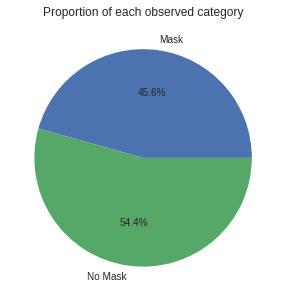

In [45]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
pie = [len(data_mask),len(data_no_mask)]
plt.pie(pie,
        labels = ['Mask','No Mask'],
        autopct='%1.1f%%'       
       )
plt.title('Proportion of each observed category')


## Preprocess

In [46]:
from keras.applications.mobilenet_v2 import preprocess_input

Using TensorFlow backend.


In [47]:
img = tf.keras.preprocessing.image.load_img("/content/Dataset/Test/Mask/2072.jpg",target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(img)

In [48]:
img_show = img/255.0

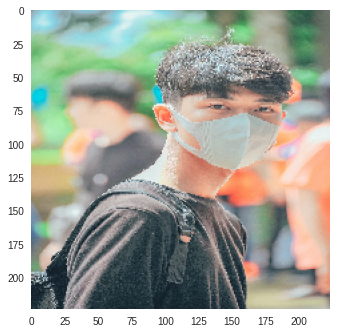

In [49]:
plt.imshow(img_show)
plt.grid(False)

In [50]:
img_pre = tf.keras.applications.mobilenet_v2.preprocess_input(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


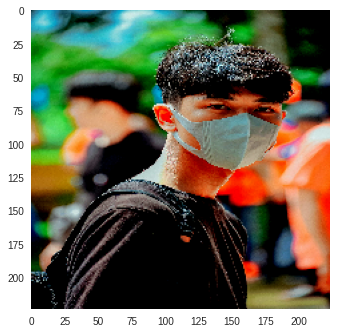

In [51]:
plt.imshow(img_pre)
plt.grid(False)

In [52]:
mask_train = os.listdir('/content/Dataset/Train/Mask')
mask_train = ['/content/Dataset/Train/Mask/'+i for i in mask_train]

no_mask_train = os.listdir('/content/Dataset/Train/No-Mask')
no_mask_train = ['/content/Dataset/Train/No-Mask/'+i for i in no_mask_train]


mask_test = os.listdir('/content/Dataset/Test/Mask')
mask_test = ['/content/Dataset/Test/Mask/'+i for i in mask_test]

no_mask_test = os.listdir('/content/Dataset/Test/No-Mask')
no_mask_test = ['/content/Dataset/Test/No-Mask/'+i for i in no_mask_test]


mask_val = os.listdir('/content/Dataset/Val/Mask')
mask_val = ['/content/Dataset/Val/Mask/'+i for i in mask_val]

no_mask_val = os.listdir('/content/Dataset/Val/No-Mask')
no_mask_val = ['/content/Dataset/Val/No-Mask/'+i for i in no_mask_val]

## Image Gen

In [53]:
train_path = '/content/Dataset/Train'
val_path = '/content/Dataset/Val'
test_path = '/content/Dataset/Test'

In [54]:
os.listdir(train_path)

['No-Mask', 'Mask']

In [55]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=16,class_mode="binary")

Found 1297 images belonging to 2 classes.


In [57]:
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=16,class_mode="binary")

Found 405 images belonging to 2 classes.


In [59]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [60]:
test_gen = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=16,class_mode="binary")

Found 299 images belonging to 2 classes.


In [61]:
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_gen.class_indices)

{'Mask': 0, 'No-Mask': 1}
{'Mask': 0, 'No-Mask': 1}
{'Mask': 0, 'No-Mask': 1}


In [71]:
model_mob = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=Input(shape=(224, 224, 3)))

In [72]:
model_mob.output

<tf.Tensor 'out_relu_1/Identity:0' shape=(None, 7, 7, 1280) dtype=float32>

In [73]:
model_main = model_mob.output
model_main = GlobalAveragePooling2D()(model_main)
model_main = Dropout(0.5)(model_main)
model_main = Dense(128,activation='relu')(model_main)
model_main = Dropout(0.5)(model_main)
model_main = Dense(1,activation='sigmoid')(model_main)

In [74]:
model = Model(model_mob.input,model_main)

In [75]:
for layers in model.layers[:-10]:
  layers.trainable = False

In [76]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [77]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
mc = tf.keras.callbacks.ModelCheckpoint(monitor='val_accuracy',filepath="./best_model.h5",save_best_only=True)
lrr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,verbose=1)

In [79]:
hist = model.fit(train_generator,steps_per_epoch=1297/16,validation_data=val_generator,validation_steps=405/16,epochs=50,callbacks=[mc,lrr])

Epoch 1/50
82/81 [==============================] - 35s 427ms/step - loss: 0.1978 - accuracy: 0.9252 - val_loss: 21.2270 - val_accuracy: 0.5136 - lr: 0.0010
Epoch 2/50
82/81 [==============================] - 33s 406ms/step - loss: 0.1206 - accuracy: 0.9545 - val_loss: 17.9966 - val_accuracy: 0.5185 - lr: 0.0010
Epoch 3/50
82/81 [==============================] - 34s 413ms/step - loss: 0.0805 - accuracy: 0.9715 - val_loss: 20.2640 - val_accuracy: 0.5309 - lr: 0.0010
Epoch 4/50
82/81 [==============================] - 34s 411ms/step - loss: 0.0873 - accuracy: 0.9715 - val_loss: 12.2940 - val_accuracy: 0.5728 - lr: 0.0010
Epoch 5/50
82/81 [==============================] - 33s 406ms/step - loss: 0.0622 - accuracy: 0.9807 - val_loss: 35.3205 - val_accuracy: 0.5111 - lr: 0.0010
Epoch 6/50
82/81 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9830
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
82/81 [==============================] - 

In [80]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

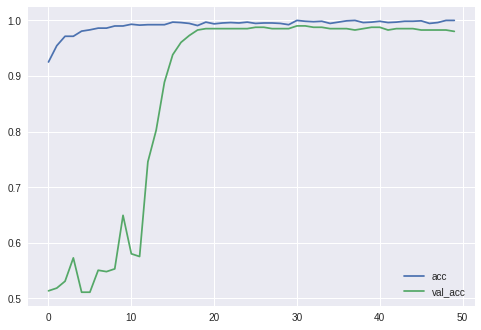

In [81]:
plt.style.use('seaborn')
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.legend()
plt.show()

In [82]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

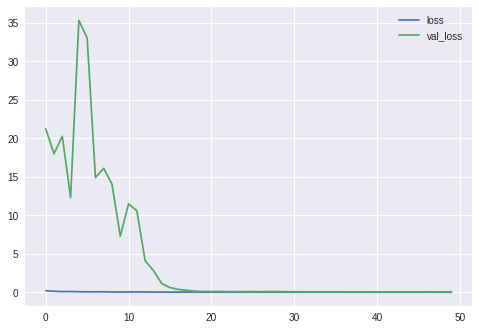

In [83]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.show()

In [85]:
model.evaluate(test_gen,steps=299/16)

19/18 [==============================] - 4s 207ms/step - loss: 0.0435 - accuracy: 0.9866


[0.04354282096028328, 0.9866220951080322]

In [86]:
from google.colab import files
files.download('/content/best_model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>